In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv(r'C:\Users\alepa\PycharmProjects\pythonProject\Optimization\Project\experiment_results.csv')
df = pd.DataFrame(df)
df

,epsilon,attack_type,norm_type,targeted,step_rule,accuracy,total_queries,avg_queries,cpu_time,gap_FW,gap_AS,avg_iters
0,0.005,fw,-1,True,lipschitz_mnist,1.00,1948,974.737410,0.010631,0.229868,NaN,10.472251
1,0.005,fw,-1,True,decay,1.00,1948,974.737410,0.012205,0.227714,NaN,10.472251
2,0.005,fw,-1,True,amjo,1.00,1948,974.737410,0.018949,0.229868,NaN,10.472251
3,0.005,fw,-1,True,ls,1.00,1948,974.737410,0.139686,0.229868,NaN,10.472251
4,0.005,fw,-1,False,lipschitz_mnist,1.00,1876,938.736926,0.013232,0.154513,NaN,10.432764
...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.300,fw_pair,2,True,ls,0.92,2002,1001.740000,0.033844,2.068792,-1.767920,10.500000
284,0.300,fw_pair,2,False,lipschitz_mnist,0.84,1851,926.248242,0.002611,2.769143,-1.359159,10.372634
285,0.300,fw_pair,2,False,decay,0.71,1794,897.742188,0.003401,1.114754,-1.024217,10.287946
286,0.300,fw_pair,2,False,amjo,0.70,1793,897.241206,0.004502,1.054151,-0.975559,10.284199


In [46]:
df_filtered = df[df['epsilon'] == 0.3]

new_cols = ['step_rule','accuracy','avg_queries','cpu_time','avg_iters']

df = df_filtered[new_cols]
df

,step_rule,accuracy,avg_queries,cpu_time,avg_iters
216,lipschitz_mnist,0.45,661.254738,0.002263,9.354056
217,decay,0.03,367.747268,0.003757,5.840164
218,amjo,0.02,371.735135,0.005448,5.924324
219,ls,0.00,367.248974,0.032361,5.753762
220,lipschitz_mnist,0.03,197.719388,0.001993,3.410714
...,...,...,...,...,...
283,ls,0.92,1001.740000,0.033844,10.500000
284,lipschitz_mnist,0.84,926.248242,0.002611,10.372634
285,decay,0.71,897.742188,0.003401,10.287946
286,amjo,0.70,897.241206,0.004502,10.284199


In [47]:
df_ls = df[df['step_rule'] == 'ls']
df_lipschitz = df[df['step_rule'] == 'lipschitz_mnist']
df_amjo = df[df['step_rule'] == 'amjo']
df_decay = df[df['step_rule'] == 'decay']

In [48]:
# drop first column for each
df_ls = df_ls.drop(columns='step_rule')
df_lipschitz = df_lipschitz.drop(columns='step_rule')
df_amjo = df_amjo.drop(columns='step_rule')
df_decay = df_decay.drop(columns='step_rule')

In [49]:
# averages

df_ls_avg = df_ls.mean()
df_lipschitz_avg = df_lipschitz.mean()
df_amjo_avg = df_amjo.mean()
df_decay_avg = df_decay.mean()

In [51]:
# append averages to new dataframe for plotting

df_avg = pd.DataFrame([df_ls_avg, df_lipschitz_avg, df_amjo_avg, df_decay_avg])
df_avg['step_rule'] = ['ls', 'lipschitz', 'amjo', 'decay']
df_avg

,accuracy,avg_queries,cpu_time,avg_iters,step_rule
0,0.340556,635.457133,0.034485,7.158111,ls
1,0.407222,666.184708,0.002590,7.570823,lipschitz
2,0.312778,636.316254,0.005439,7.181316,amjo
3,0.307222,634.318370,0.003008,7.203220,decay


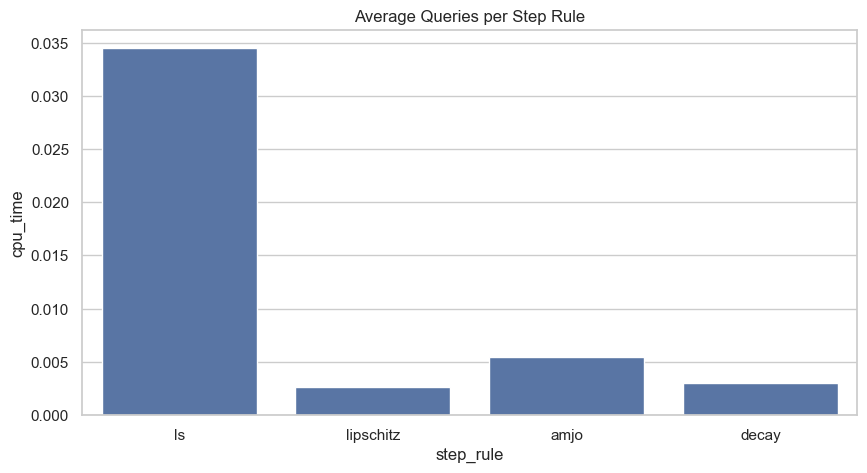

In [53]:
# plot

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='step_rule', y='cpu_time', data=df_avg)
plt.show()

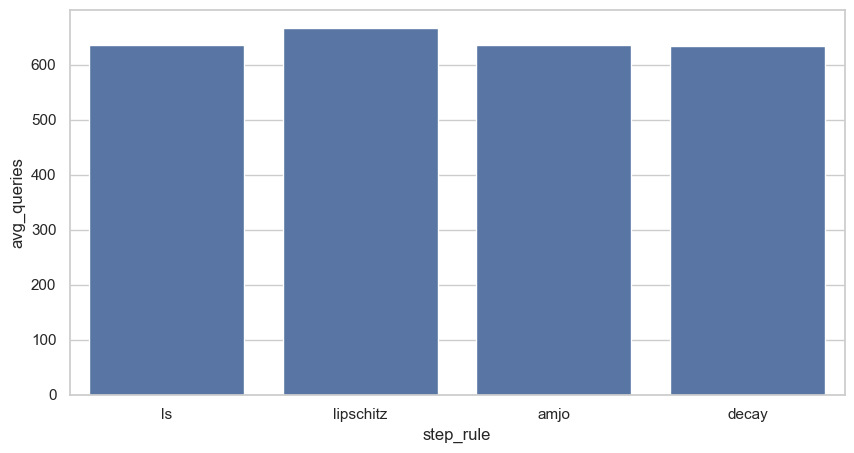

In [54]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='step_rule', y='avg_queries', data=df_avg)
plt.show()

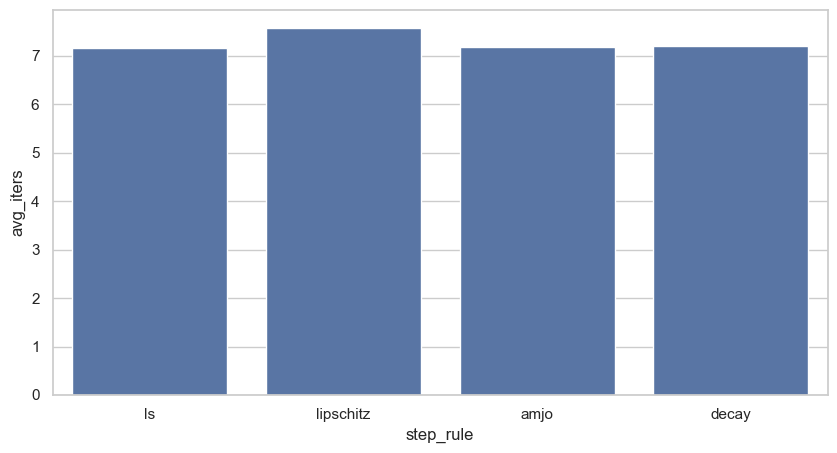

In [55]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='step_rule', y='avg_iters', data=df_avg)
plt.show()